In [ ]:
# A beta-binomial model
# Suppose n is the sample size, k is the number of successes,
# k|n, θ ∼ Binomial(n, θ)
# θ ∼ Beta(a, b)
# We can derive the marginal likelihood, ML, analytically,
# ML = (
# n
# k
# )
# (k+a−1)!(n−k+b−1)!
# (n+a+b−1)!
# Suppose
# k=2, n=10, a=1, b=1
# ML = 1/(10 + 1) = 0.0909
# and posterior distribution of θ will be
# θ|k = 2, n = 10 ∼ Beta(3, 9)
# Let us estimate the posterior distribution using a simple Metropolis-Hastings sampler

<!-- Example. A beta-binomial model
Suppose n is the sample size, k is the number of successes,
k|n, θ ∼ Binomial(n, θ)
θ ∼ Beta(a, b)
We can derive the marginal likelihood, ML, analytically,
ML = (
n
k
)
(k+a−1)!(n−k+b−1)!
(n+a+b−1)!
Suppose
k=2, n=10, a=1, b=1
ML = 1/(10 + 1) = 0.0909
and posterior distribution of θ will be
θ|k = 2, n = 10 ∼ Beta(3, 9)
Let us estimate the posterior distribution using a simple Metropolis-Hastings sampler -->

In [ ]:
k <- 2
n <- 10
a <- 1
b <- 1

In [ ]:
# Markov chain
nsamp <- 50000
theta_chain <- rep(NA,nsamp)


In [ ]:
#Initialization of Markov chain

theta_chain[1] <- rbeta(1,1,1)

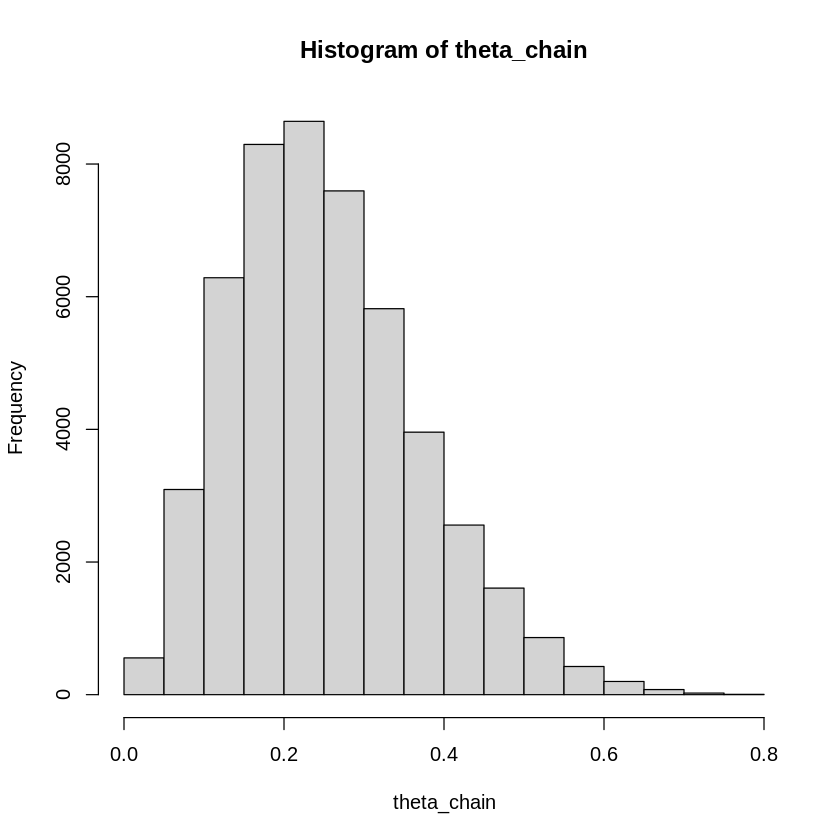

In [ ]:
#Evolution of Markov chain
i <- 1
step <- 0.08 # step-size for proposal distribution
while(i<nsamp){
#Sample from proposal distribution
proposal_theta <- rnorm(1,theta_chain[i],step)
# This is not a very good proposal distribution,
# because proposed values can go out of [0,1] range
if(proposal_theta>0&proposal_theta<1){
# Compute prior*likelihood
post_new <- dbinom(k,n,proposal_theta)*dbeta(proposal_theta,a,b)
post_prev <- dbinom(k,n,theta_chain[i])*dbeta(theta_chain[i],a,b)
#Compute Hastings ratio
Hastings_ratio <- (post_new*dnorm(theta_chain[i],proposal_theta,step))/
(post_prev*dnorm(proposal_theta,theta_chain[i],step))
p_str <- min(Hastings_ratio,1) # probability of acceptance
if(p_str>runif(1,0,1)){
theta_chain[i+1] <- proposal_theta
i <- i+1
}
}
}
hist(theta_chain)

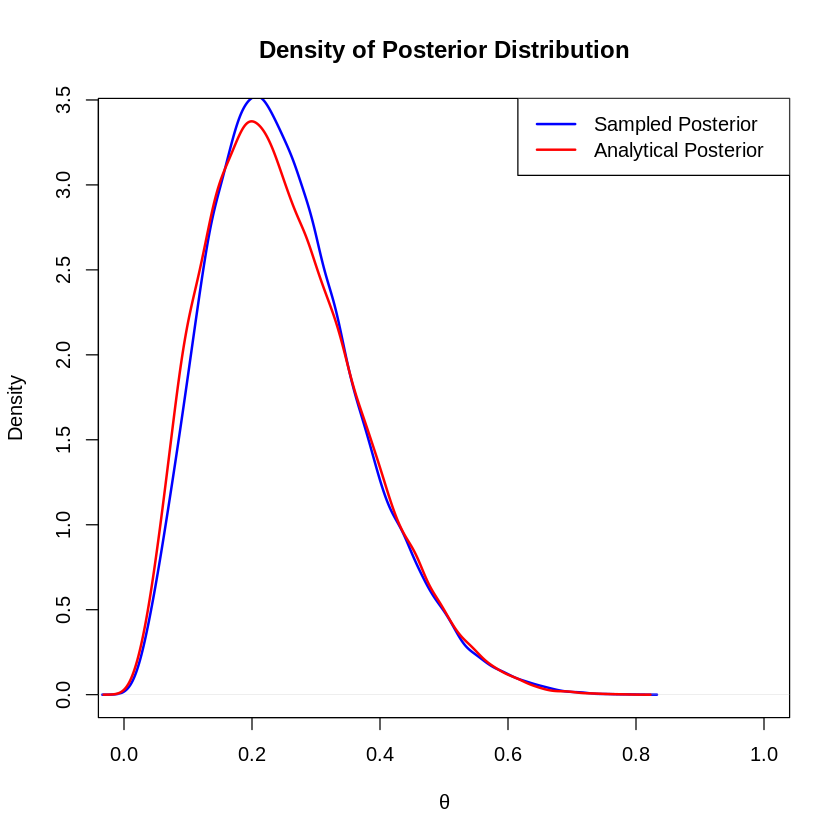

In [ ]:
# Generate samples from the analytical posterior distribution
analytical_posterior <- rbeta(50000, k + a, n - k + b)

# Plot density using base R functions
# Create an empty plot with appropriate limits
plot(density(theta_chain), main="Density of Posterior Distribution",
     xlab="θ", ylab="Density", col="blue", lwd=2, xlim=c(0,1), ylim=c(0, max(density(analytical_posterior)$y, na.rm=TRUE)))

# Add density for the analytical posterior
lines(density(analytical_posterior), col="red", lwd=2)

# Add a legend
legend("topright", legend=c("Sampled Posterior", "Analytical Posterior"),
       col=c("blue", "red"), lwd=2)